Pre-processing is the concept of standardizing our model development dataset. This is applied in situations where we have differences in the magnitude of numeric features and situations where we have categorical and continuous variables.The goal of the preprocessing work is to prepare our data for fitting models.

general steps in pre-processing and training data development:

**1-Create dummy or indicator features for categorical variables**

**2-Standardize the magnitude of numeric features**

**3-Split into testing and training datasets**


In [19]:
# data manipulation and math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**1.-Loading the Data**

As a first step, read in the data and view all the columns, and display the top of the DataFrame.

In [2]:
# load the data
aa_no_pm= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_no_pm_cleaned.csv')
df= aa_no_pm.copy()
print('The data have ',df.shape[0], 'rows and',df.shape[1],'columns')

print('Columns name: \n')
print('\n'.join(list(df.columns)))

The data have  347 rows and 7 columns
Columns name: 

Year
GeoType
GeoID
Number
no2/Mean ppb
Geography
pm/Mean mcg/m3


In [3]:
df.head()

,Year,GeoType,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3
0,2020,CD,101,80.0,21.7,Financial District (CD1),7.5
1,2020,CD,102,81.0,21.3,Greenwich Village and Soho (CD2),8.5
2,2020,CD,103,661.0,19.4,Lower East Side and Chinatown (CD3),7.5
3,2020,CD,104,364.0,22.5,Clinton and Chelsea (CD4),8.0
4,2020,CD,105,116.0,26.3,Midtown (CD5),9.2


**2.Transformation of categorical features**

In general, categorical features need to be transformed or encoded to be used in some machine learning models.In this project the only column 'GeoType' must be encoded.We are not going to use the other ones in the model.

In [4]:
# Transform categorical columns 

df_transformed= pd.get_dummies(df,columns=['GeoType'])


In [5]:
df_transformed.head()

,Year,GeoID,Number,no2/Mean ppb,Geography,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,101,80.0,21.7,Financial District (CD1),7.5,False,True,False,False
1,2020,102,81.0,21.3,Greenwich Village and Soho (CD2),8.5,False,True,False,False
2,2020,103,661.0,19.4,Lower East Side and Chinatown (CD3),7.5,False,True,False,False
3,2020,104,364.0,22.5,Clinton and Chelsea (CD4),8.0,False,True,False,False
4,2020,105,116.0,26.3,Midtown (CD5),9.2,False,True,False,False


In [6]:
# Drop irrelevant columns
df_transformed=df_transformed.drop(columns=['GeoID','Geography'],axis=1)

In [7]:
df_transformed

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,80.0,21.7,7.5,False,True,False,False
1,2020,81.0,21.3,8.5,False,True,False,False
2,2020,661.0,19.4,7.5,False,True,False,False
3,2020,364.0,22.5,8.0,False,True,False,False
4,2020,116.0,26.3,9.2,False,True,False,False
...,...,...,...,...,...,...,...,...
342,2009,20450.0,24.1,10.5,True,False,False,False
343,2009,14493.0,33.9,12.6,True,False,False,False
344,2009,10602.0,22.2,10.0,True,False,False,False
345,2009,2843.0,16.8,9.8,True,False,False,False


**3.-Standardize the magnitude of numeric features**

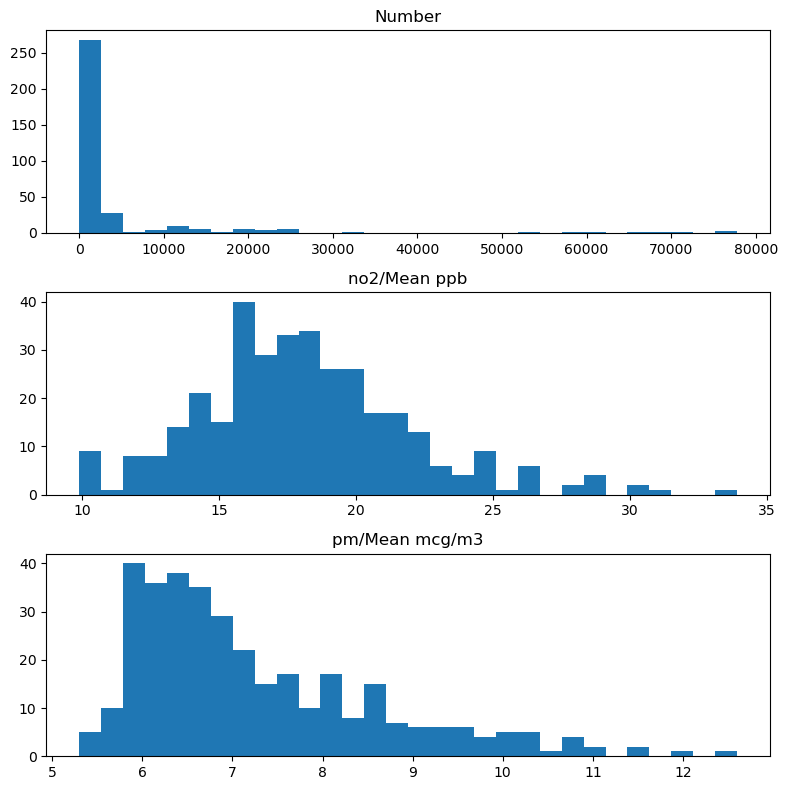

In [8]:
# Making a histogram for each variable in df

columns=['Number','no2/Mean ppb','pm/Mean mcg/m3']

# Create a figure with three subplots
fig,axs= plt.subplots(3,1,figsize=(8, 8))

# Plot histograms for each column
for i,col in enumerate(columns):
    axs[i].hist(df_transformed[col],bins=30)
    axs[i].set_title(col)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The histogram shows that the Number column is highly skewed with many outliers. The values range from small to very large, with a significant number of very high values. Given this distribution, Log transformation can help to stabilize the variance and make the data more normally distributed.

The no2/Mean ppb column seems to have a relatively normal distribution but is slightly skewed. StandardScaler is a good choice here as it standardizes the data to have a mean of 0 and a standard deviation of 1.

The pm/Mean mcg/m3 column appears to be skewed to the right. MinMaxScaler can be a good choice for this column to scale the data to a fixed range.

In [9]:
#Instantiate StandardScaler
scaler= StandardScaler()

#Train the transform on the data
scaler.fit(df_transformed[['no2/Mean ppb']])

#Apply the StandardScaler to the data
df_transformed['no2/Mean ppb']=scaler.transform(df_transformed[['no2/Mean ppb']])

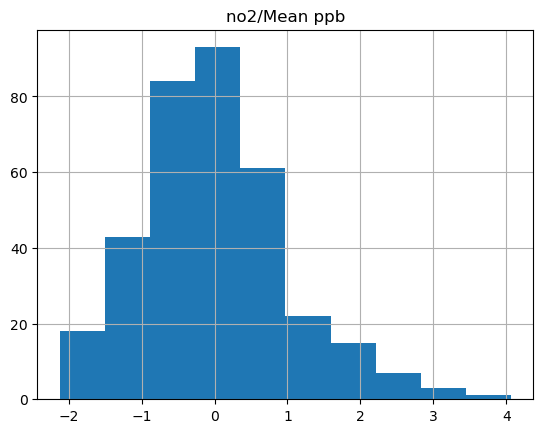

In [10]:
df_transformed[['no2/Mean ppb']].hist()
plt.show()

In [11]:
#Instantiate PowerTransformer
log= PowerTransformer()

#Train the transform on the data
log.fit(df_transformed[['Number']])

#Apply the PowerTransformer to the data
df_transformed['Number']=log.transform(df_transformed[['Number']])

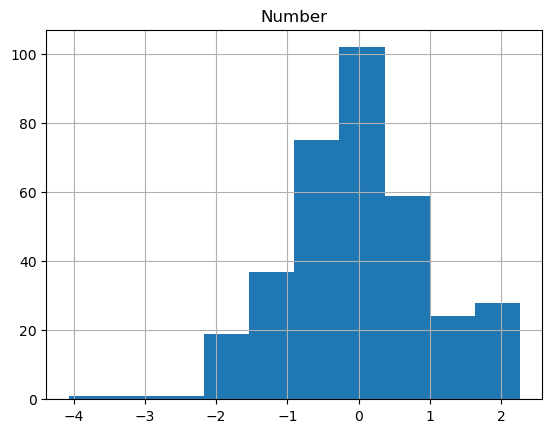

In [12]:
df_transformed[['Number']].hist()
plt.show()

In [13]:
#Instantiate MinMaxScaler
scaler=MinMaxScaler()

#Train the transform on the data
scaler.fit(df_transformed[['pm/Mean mcg/m3']])

#Apply the MinMaxScaler to the data
df_transformed['pm/Mean mcg/m3']= scaler.transform(df_transformed[['pm/Mean mcg/m3']])


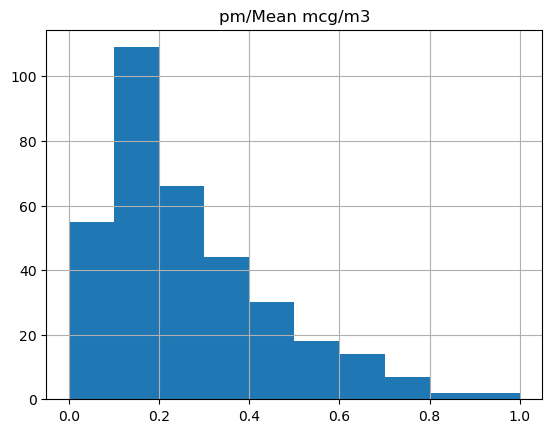

In [14]:
df_transformed[['pm/Mean mcg/m3']].hist()
plt.show()

**4.Split into testing and training datasets**


In [15]:
df_transformed.head()

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,-1.996623,0.921234,0.301370,False,True,False,False
1,2020,-1.984977,0.818190,0.438356,False,True,False,False
2,2020,-0.258725,0.328731,0.301370,False,True,False,False
3,2020,-0.702377,1.127321,0.369863,False,True,False,False
4,2020,-1.655852,2.106239,0.534247,False,True,False,False


In [16]:
#Separate the features and the target variable
x=df_transformed.drop(columns=['Number'])
y=df_transformed['Number']

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (277, 7)
x_test shape: (70, 7)
y_train shape: (277,)
y_test shape: (70,)


**5.Save Data**

In [20]:
# save the data to a new csv file
# Path to the directory where you want to save the file
data_path = '../data'
# Create the directory if it does not exist
os.makedirs(data_path, exist_ok=True)

#save the dataframe to a CSV file in the new directory
df_transformed.to_csv(os.path.join(data_path, 'aa_transformed'), index=False)
